<a href="https://colab.research.google.com/github/aszapla/Curso-DL/blob/master/2_2_2_Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2.2. Ejercicio

En este ejercicio vamos a crear una Red Neuronal Recurrente para aprender la función seno. Trataremos los valores de esta función como una serie temporal e intentaremos predecir el siguiente elemento de la serie dados los últimos 5 valores. 

Sigue los pasos indicados y completa las líneas marcadas con "**TODO**".

## Paso 1. Definir la serie temporal

En primer lugar crearemos la serie temporal, la dividiremos en secuencias de longitud determinada y guardaremos también el siguiente valor a predecir para cada secuencia. 

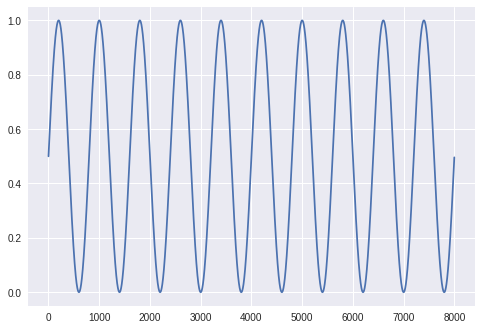

Tamaño de la serie:
Número secuencias:  7995
Número caracteres:  7995


In [0]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


# Definimos la serie temporal que queremos predecir y la mostramos
sample = 8000
time = np.arange(sample)
serie = (np.sin(2 * np.pi * 10 * time / sample) + 1) / 2

plt.plot(time, serie)
plt.show()    # TODO: Llama a la función para mostrar el plot

print('Tamaño de la serie:',    )   # TODO: Muestra el tamaño de la serie


# Dividimos la serie en secuencias de longitud "maxlen" 
maxlen = 5
secuencias = []
next_value = []

for i in range(0, len(serie) - maxlen):
  secuencias.append(serie[i: i + maxlen])
  next_value.append(serie[i + maxlen])

print('Número secuencias:  {}'.format(len(secuencias)))
print('Número caracteres:  {}'.format(len(next_value)))

## Paso 2. Preparar los datos para el entrenamiento

En este segundo paso vamos a preparar los datos para poder pasárselos a la red. 

In [0]:
%%capture --no-stdout
from sklearn.model_selection import train_test_split
import numpy as np


# Transformamos las series a arrays de numpy
x = np.array(secuencias) # TODO: Transforma la variable "secuencias" a una array de Numpy
y = np.array(next_value) # TODO: Transforma la variable "next_value" a una array de Numpy


# Añadimos el canal final donde estarán alojados los valores de la serie
# (Recordad que este tipo de redes en Keras esperan una entrada con 3 dimensiones)
x = x.reshape(x.shape[0], x.shape[1], 1)
y = y.reshape(y.shape[0], 1)


# Dividimos los datos para entrenamiento y validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

print('x_train shape: {}'.format(x_train.shape))   # TODO: Muestra la forma de la variable "x_train"
print('y_train shape: {}'.format(y_train.shape))   # TODO: Muestra la forma de la variable "y_train"
print('x_test shape: {}'.format(x_test.shape))     # TODO: Muestra la forma de la variable "x_test"
print('y_test shape: {}'.format(y_test.shape))     # TODO: Muestra la forma de la variable "y_test"


x_train shape: (6396, 5, 1)
y_train shape: (6396, 1)
x_test shape: (1599, 5, 1)
y_test shape: (1599, 1)


## Paso 3. Construir la red y entrenar

A continuación vamos a construir el modelo de red recurrente y lo entrenaremos. 

La red solamente tendrá dos capas:

* Una primera capa LSTM con una única neurona

* Y una segunda capa tipo "densa" que actuará de salida, con una única neurona con activación lineal. 

Compilamos este modelo usando la función de pérdida "*mse*" (*Mean squared error*) y el optimizador ""*rmsprop*"".

Seguidamente la entrenaremos durante 5 épocas usando un tamaño de batch de 32.

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense


print('Construimos el modelo de red...')

model1 = Sequential()  # TODO: Define un modelo secuencial
model1.add(LSTM(1 , input_shape=(maxlen, 1)))   # TODO: Indica que la capa LSTM solo va a contener una neurona
model1.add(Dense(1  , activation='linear'))      # TODO: Indica que la capa densa de salida solo va a contener una neurona

model1.compile(loss='mse', optimizer='rmsprop')    # TODO: Compila el modelo utilizando "mse" como función de pérdida y "rmsprop" como optimizador


print('Entrenamos la red...')

history = model1.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)

Construimos el modelo de red...
Entrenamos la red...
Epoch 1/5
 - 1s - loss: 0.2564
Epoch 2/5
 - 1s - loss: 0.1169
Epoch 3/5
 - 1s - loss: 0.0591
Epoch 4/5
 - 1s - loss: 0.0079
Epoch 5/5
 - 1s - loss: 0.0011


Una vez entrenado vamos a evaluar la red usando el conjunto de test y a mostrar los resultados. 

1599/1599 [==============================] - 0s 51us/step
MSE: 0.00082
Predicción shape: (1599, 1)


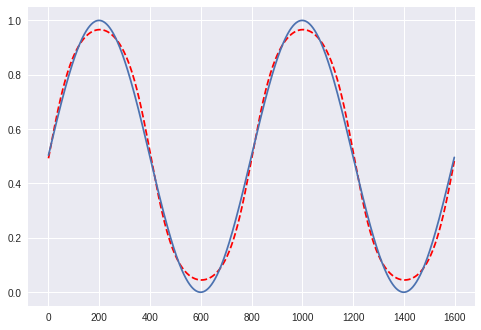

In [0]:
# Mostramos el Mean Squared Error
print('MSE: {:.5f}'.format(model1.evaluate(x_test, y_test)))


# Obtenemos la predicción de la red para el conjunto de evaluación
prediccion = model1.predict(x_test, verbose=0)  # TODO: Llama a la función para calcular la predicción a partir de la variable "x_test"
print('Predicción shape: {}'.format(prediccion.shape))


# Y lo mostramos en una gráfica. En color rojo mostramos la predicción 
# y en azul el valor esperado.
plt.plot(range(len(x_test)), prediccion.reshape(prediccion.shape[0]), 'r--')
plt.plot(range(len(x_test)), y_test)
plt.show()

La predicción de la red se ajusta bastante bien al resultado esperado, sin embargo sí que se puede ver que se equivoca en la altura de la curva. 


## Paso 4. Construir un modelo de red más potente

Vamos a construir un modelo de red más potente para intentar mejorar el resultado obtenido. 

Nos basaremos en el modelo anterior pero subiremos el número de neuronas LSTM a 4. 

El resto de la configuración y parámetros permanecerán igual, con la excepción del número de épocas, que también lo subiremos a 25.


In [0]:
print('Construimos el modelo de red...')

model2 = Sequential()
model2.add(LSTM(4  , input_shape=(maxlen, 1)))   # TODO: Indica que la capa LSTM va a contener 4 neuronas
model2.add(Dense(1, activation='linear'))

model2.compile(loss='mse', optimizer='rmsprop')


print('Entrenamos la red...')

history = model2.fit(x_train, y_train, 
                     batch_size= 32  ,    # TODO: Establece el tamaño de batch a 32
                     epochs= 25  ,        # TODO: Establece el número de épocas a 25
                     verbose=2)

Construimos el modelo de red...
Entrenamos la red...
Epoch 1/25
 - 2s - loss: 0.1145
Epoch 2/25
 - 1s - loss: 8.3663e-04
Epoch 3/25
 - 1s - loss: 2.3705e-04
Epoch 4/25
 - 1s - loss: 1.9071e-04
Epoch 5/25
 - 1s - loss: 1.5983e-04
Epoch 6/25
 - 1s - loss: 1.4142e-04
Epoch 7/25
 - 1s - loss: 1.2603e-04
Epoch 8/25
 - 1s - loss: 1.1524e-04
Epoch 9/25
 - 1s - loss: 1.0461e-04
Epoch 10/25
 - 1s - loss: 9.6331e-05
Epoch 11/25
 - 1s - loss: 8.8783e-05
Epoch 12/25
 - 1s - loss: 8.3434e-05
Epoch 13/25
 - 1s - loss: 7.9002e-05
Epoch 14/25
 - 1s - loss: 7.4839e-05
Epoch 15/25
 - 1s - loss: 7.1555e-05
Epoch 16/25
 - 1s - loss: 6.9881e-05
Epoch 17/25
 - 1s - loss: 6.5528e-05
Epoch 18/25
 - 1s - loss: 6.3543e-05
Epoch 19/25
 - 1s - loss: 6.1519e-05
Epoch 20/25
 - 1s - loss: 6.0476e-05
Epoch 21/25
 - 1s - loss: 5.8512e-05
Epoch 22/25
 - 1s - loss: 5.6501e-05
Epoch 23/25
 - 1s - loss: 5.5707e-05
Epoch 24/25
 - 1s - loss: 5.4266e-05
Epoch 25/25
 - 1s - loss: 5.5256e-05


Y una vez entrenado el nuevo modelo vamos a evaluar la mejora obtenida. 

1599/1599 [==============================] - 0s 49us/step
MSE: 0.00005


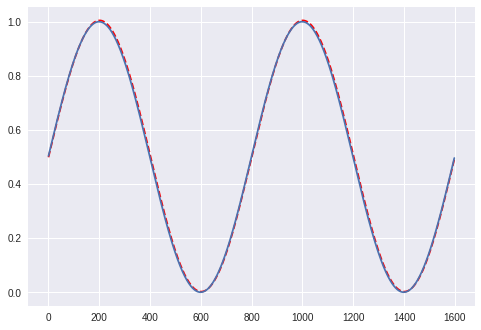

In [0]:
# Mostramos el Mean Squared Error
print('MSE: {:.5f}'.format(model2.evaluate(x_test, y_test)))


# Obtenemos la predicción de la red para el conjunto de evaluación y lo mostramos
# en una gráfica.
prediccion = model2.predict(x_test, verbose=0)   # TODO: Llama a la función para calcular la predicción a partir de la variable "x_test"

plt.plot(range(len(x_test)), prediccion.reshape(prediccion.shape[0]), 'r--')
plt.plot(range(len(x_test)), y_test)
plt.show()

En este caso podemos ver como el error es mucho menor. Con solo 4 neuronas LSTM y entrenando durante 25 épocas conseguimos que la predicción se ajuste casi perfectamente al valor esperado. 